In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
# resolve all imports
import numpy as np
import matplotlib.pyplot as plt

from NeuralNetwork import NeuralNetwork
from activations import *
from optimization_functions import *
from cost_functions import *
from load import *
from gradient_check import *

np.random.seed(1)

# Bird Classification Dataset

In [3]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_birds()

y = 0. It's a non-cat picture.


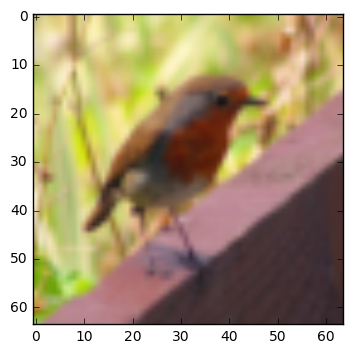

In [4]:
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8")+  " picture.")

In [5]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [6]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [18]:
layers_dims = [12288, 20, 7, 5, 1] #  5-layer model
activation_funcs = [relu, relu, relu, sigmoid]
keep_probs = [1.0,1.0,1.0]
# keep_probs = [0.5, 0.5, 0.5]

hyperparameters = {
    "layers_dims":layers_dims,
    "init_method":"Xavier",
    "optimization_function":GradientDescent,
    "activation_funcs":activation_funcs,
    "cost_func":Cross_Entropy_Loss,
    "reg_type":L2_Regularization,
    "reg_lambd":0.001,
    "learning_rate": 0.0075,
    "keep_probs":keep_probs
}
nn = NeuralNetwork(**hyperparameters)

In [19]:
nn.Fit(train_x, train_y, num_iterations=2500, mini_batch_size=train_x.shape[1], print_cost=True)

Cost after iteration 0: 0.771837
Cost after iteration 100: 0.672477
Cost after iteration 200: 0.647337
Cost after iteration 300: 0.610525
Cost after iteration 400: 0.571067
Cost after iteration 500: 0.523196
Cost after iteration 600: 0.491804
Cost after iteration 700: 0.543537
Cost after iteration 800: 0.387217
Cost after iteration 900: 0.351114
Cost after iteration 1000: 0.292383
Cost after iteration 1100: 0.268971
Cost after iteration 1200: 0.216903
Cost after iteration 1300: 0.215338
Cost after iteration 1400: 0.171759
Cost after iteration 1500: 0.158040
Cost after iteration 1600: 0.142209
Cost after iteration 1700: 0.131887
Cost after iteration 1800: 0.123565
Cost after iteration 1900: 0.115919
Cost after iteration 2000: 0.109906
Cost after iteration 2100: 0.104191
Cost after iteration 2200: 0.098904
Cost after iteration 2300: 0.094240
Cost after iteration 2400: 0.089586


In [20]:
pred_train, score = nn.Score(train_x, train_y, print_accuracy=True)
pred_test, score = nn.Score(test_x, test_y, print_accuracy=True)

Accuracy: 0.985645933014
Accuracy: 0.84


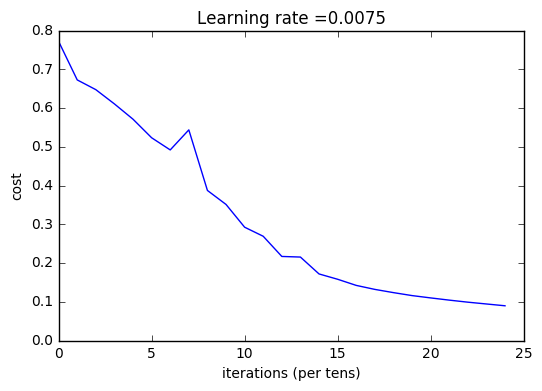

In [21]:
nn.Graph_Costs_Over_Time()

### Gradient Check
We want to make sure our implementation of backpropagation is correct

In [26]:
# gradient checking
from processing.vector_transform import *
theta, keys = dictionary_to_vector(nn.parameters)
parameters = vector_to_dictionary(theta, keys)

def gradient_check_n_test_case(): 
    np.random.seed(1)
    x = np.random.randn(4,3)
    y = np.array([[1, 1, 0]])
    W1 = np.random.randn(5,4) 
    b1 = np.random.randn(5,1) 
    W2 = np.random.randn(3,5) 
    b2 = np.random.randn(3,1) 
    W3 = np.random.randn(1,3) 
    b3 = np.random.randn(1,1) 
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}

    
    return x, y, parameters

X, Y, parameters = gradient_check_n_test_case()
Check(X, Y, parameters, [sigmoid, sigmoid, sigmoid], Cross_Entropy_Loss)

There is a mistake in the backward propagation! difference = 0.698570399235


In [29]:
from layers import *
def linear_activation_backward_test_case():
    aL, linear_activation_cache = (np.array([[ 3.1980455 ,  7.85763489]]), ((np.array([[-1.02387576,  1.12397796], [-1.62328545,  0.64667545], [-1.74314104, -0.59664964]]), np.array([[ 0.74505627,  1.97611078, -1.24412333]]), 5), np.array([[ 3.1980455 ,  7.85763489]])))
    return aL, linear_activation_cache

def linear_act_backwards(dA, cache, activation):
    linear_cache, activation_cache = cache
    dZ = dA * activation(activation_cache, derivative=True)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db
    
AL, linear_activation_cache = linear_activation_backward_test_case()
dA_prev, dW, db = linear_act_backwards(AL, linear_activation_cache, relu)
print(str(dA_prev))
print(str(dW))
print(str(db))

[[  2.38272385   5.85438014]
 [  6.31969219  15.52755701]
 [ -3.97876302  -9.77586689]]
[[ 2.77870358 -0.05500058 -5.13144969]]
[[ 5.52784019]]


# Planar Dataset 

In [ ]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

X, Y = load_planar_dataset()
print(X.shape)
print(Y.shape)

In [ ]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [ ]:
layers_dims = [2, 4, 1]
hyperparameters = {
    "layers_dims":layers_dims,
    "init_method":"Xavier",
    "optimization_function":GradientDescent,
    "activation_funcs":[tanh, sigmoid],
    "cost_func":Cross_Entropy_Loss,
    "reg_type":L2_Regularization,
    "reg_lambd":0.0,
    "learning_rate": 1.2,
    "keep_probs":[1.0,1.0,1.0],
#     "keep_probs": [0.5, 0.5, 0.5],  
}
planar_nn = NeuralNetwork(**hyperparameters)

In [ ]:
planar_nn.Fit(X, Y, num_iterations=10000, mini_batch_size = X.shape[1], print_cost=True)

In [ ]:
pred_train, score = planar_nn.Score(X, Y, print_accuracy=True)

# MNIST Dataset

# TODO List and Features to Implement

- ~~Change db from scalar to vector of (layer size, 1)~~
- Activation Functions:
    - Softmax and derivative
    - ~~Tanh and derivative~~
    - ~~make passing in activation functions functional~~
    - ~~Pass activation functions into the cache to make it easily retrievable~~
    - Remove dA from the calculations of derivatives.  Make custom implementations easier.
        - Only need Z and derivative(bool) as parameters.  Move dA into backprop
- Optimization Functions:
    - Base Optimization
        - ~~Minibatch~~
        - Learning Rate Decay
    - ~~Gradient Descent~~
    - Classic Momentum
    - Nesterov Momentum
    - RMSProp
    - Adam
- Gradient Checks
- ~~Dropout layers~~
- Batch-Normalization
- Preprocessing Functions

# Bugs
- Dropout
    - Bug concerning numerical stability.  Sigmoid will output 1.0 only without dropout turned on.
    - Tried using a "stable" sigmoid, bug persisting.

